# **Algerian Dataset with a twist**
 It is supposed to be a `classification`  problem, but whatif you had to predict the Temperature. and all you were provided with was the **Algerian Dataset** ?

## Linear Regression on Algerian Dataset for predicting `Temperature`

### Steps we are going to follow:
- Load dataset
- Basic pre-processing
  - Datatype conformation
  - Missing value filling
  - Data correction
- EDA
  - Univariate and Bi-variate feature assessment
    - Correlation Handling
  - Linear regression assumption conformation
- Machine Learning Model
  - Linear model
  - Ridge and Lasso test
  - performance test
- repeat to Feature Engineering If required

# TESTS TO FOLLOW
- Test with outlier removal and filling
- Test whether the record is an outlier or the specific datapoint on that specific feature is.
- Tes

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Loading the dataset
raw=pd.read_csv('./algerianForest.csv')
raw

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
raw[120:]

,,,,,,,,,,,,,Bejaia Region Dataset
28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


We encounter our first few problem glaring at us.
- Incorrect indexing.
- Incorrect column naming


In [5]:
# handling indexing problem
raw=raw.reset_index()

raw

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,Bejaia Region Dataset
0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [6]:
# Handling incorrect column problem
raw.columns=raw.loc[0]

In [7]:
raw=raw.drop(0)
raw

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
5,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [8]:
raw.columns=[col.strip() for col in raw.columns]

In [9]:
raw.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

**2. Missing Dataset**

In [10]:
for col in raw.columns:
    display(raw[raw[col].isna()])

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


- Dividing the region wise dataset(Going the long road for solving the missing value and also segregating based on region)



In [11]:
sidi_bel=raw.iloc[124:]
sidi_bel.reset_index(drop=True,inplace=True)
sidi_bel

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
118,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
119,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
120,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [12]:
Bejaia=raw.iloc[:122]
Bejaia.reset_index(drop=True,inplace=True)
Bejaia

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire


In [13]:
df=pd.concat([Bejaia,sidi_bel])
df.reset_index(drop=True,inplace=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [14]:
# Handling 168th row miss placed values
for col in df.columns:
    print(col)
    display(df[df[col].isna()])
    

day


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


month


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


year


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


Temperature


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


RH


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


Ws


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


Rain


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


FFMC


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


DMC


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


DC


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


ISI


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


BUI


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


FWI


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


Classes


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [15]:
df['Classes']=df['Classes'].apply(lambda x: x.strip()=='fire' if type(x)==str else 'fire') # It was fire in FWI

df['Classes']
df.loc[165]

day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes           fire
Name: 165, dtype: object

In [16]:
df.Classes.fillna(True)

0      False
1      False
2      False
3      False
4      False
       ...  
239     True
240    False
241    False
242    False
243    False
Name: Classes, Length: 244, dtype: object

In [17]:
# Filtering out required features

feature_pool=df.iloc(axis=1)[3:]

In [18]:
feature_pool=pd.DataFrame(feature_pool)
feature_pool

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,False
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,False
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,False
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,False
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,False
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,True
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,False
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,False
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,False


In [19]:
type('')==str

True

In [20]:
# Handling dataset datatypes
def convert_to_num(x):
    
    try:
       return float(x.replace(' ','')) if type(x)==str else float(x)
            
    except Exception:
            return np.nan
for col in feature_pool.columns:
    feature_pool[col]=feature_pool[col].apply(convert_to_num)



feature_pool


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
239,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
240,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0
241,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0
242,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0


In [21]:

feature_pool.FWI=feature_pool.FWI.fillna(feature_pool.FWI.mean())

In [22]:
feature_pool[feature_pool.FWI.isna()]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [23]:
feature_pool.dtypes

Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes        float64
dtype: object

# Uni-variate analysis

In [24]:
for col in feature_pool:
    print(col)

Temperature
RH
Ws
Rain
FFMC
DMC
DC
ISI
BUI
FWI
Classes


In [25]:
feature_pool.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.564599,0.516015
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.577577,-0.432161
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.032315,-0.069964
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324369,-0.379097
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.690289,0.769492
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875827,0.585658
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.738714,0.511123
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.916343,0.735197
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.857628,0.586639
FWI,0.564599,-0.577577,0.032315,-0.324369,0.690289,0.875827,0.738714,0.916343,0.857628,1.000000,0.719216


In [26]:
feature_pool=feature_pool.rename({'Classes':'isFire'},axis=1)
feature_pool

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,isFire
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
239,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
240,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0
241,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0
242,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0


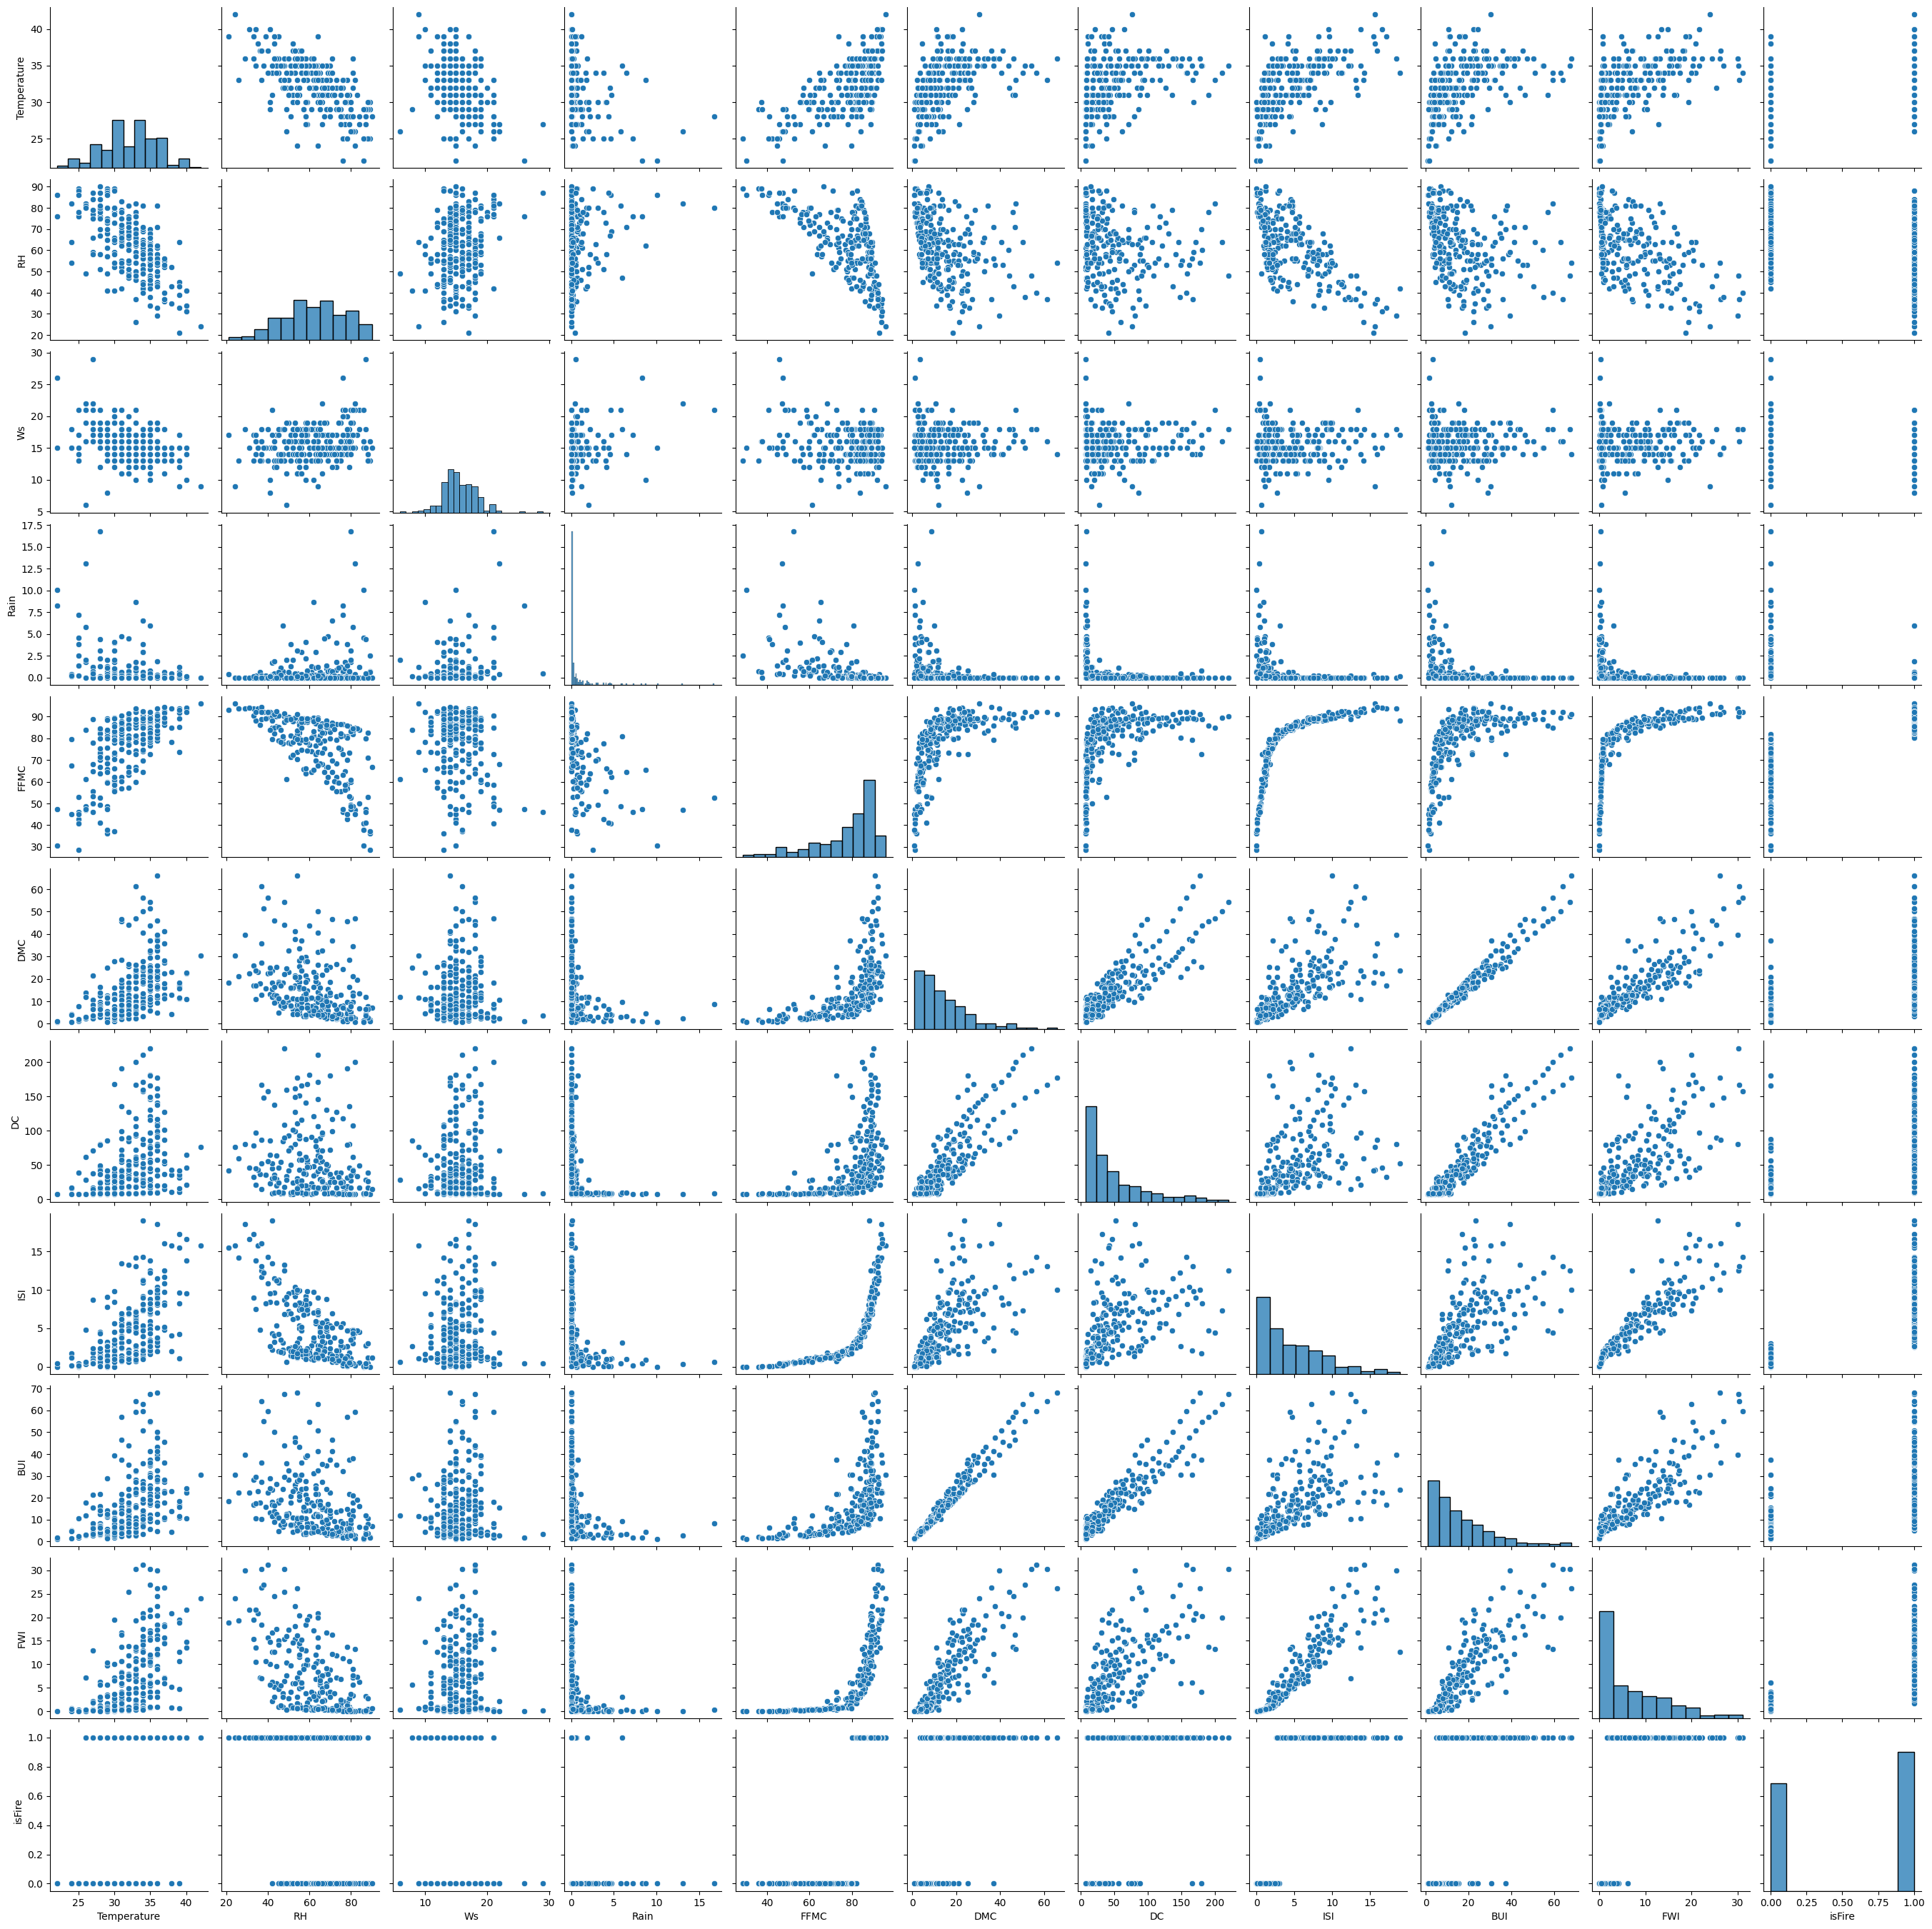

In [27]:
sns.pairplot(feature_pool)

In [28]:
feature_pool.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,isFire
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


In [29]:
Target=feature_pool.Temperature
Target

0      29.0
1      29.0
2      26.0
3      25.0
4      27.0
       ... 
239    30.0
240    28.0
241    27.0
242    24.0
243    24.0
Name: Temperature, Length: 244, dtype: float64

In [30]:
feature_pool=feature_pool.drop('Temperature',axis=1)



In [31]:
feature_pool

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,isFire
0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...
239,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
240,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0
241,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0
242,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0


# Feature Engineering- Feature Selection
- [Fire Weather Index (FWI) System | NWCG](https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system)

As per this piece of document that we found based on our feature analysis at a domain level
We can assume there are a few routes we can take.
- And there are also few preprocessing we need to do1
  - Since it is going to be heptic. Instead of going the classic free fall method, a functional and OOPS programming method betterprefered to avoid repeated clutter of code and better readability
  

**Few ChatGPT advicess I got along the way**

Feature selection is an important step in building a regression model, as it helps improve model performance, reduce overfitting, and enhance interpretability. In your case, you have a dataset with features like RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, and you want to predict Temperature via regression.

Given that you have a feature like FWI that is a direct function of other sibling features, you need to consider how to handle it effectively. Here are some steps you can take for feature selection in this scenario:

1. **Feature Importance Analysis:**
   Start by performing a feature importance analysis using a technique such as Random Forest feature importance or Gradient Boosting feature importance. These methods can help you identify which features have the most impact on predicting the target variable (Temperature). This analysis can guide you in selecting the most relevant features for your regression model.

2. **Correlation Analysis:**
   Analyze the correlations between all the features, including the derived feature FWI, and the target variable (Temperature). Features that have strong correlations with the target are good candidates to keep in your model. However, be cautious of multicollinearity (high correlation between features) which can lead to instability in the model.

3. **Domain Knowledge:**
   Since you mentioned that FWI is a direct function of other sibling features, consider the domain knowledge. If FWI is highly correlated with other features and doesn't provide significant additional information, you might choose to exclude it to simplify the model and reduce multicollinearity.

4. **Recursive Feature Elimination (RFE):**
   RFE is a technique where you train the model with all features and iteratively remove the least important feature at each step. This process continues until a desired number of features is reached or model performance plateaus.

5. **Regularization Techniques:**
   Regularization techniques like Lasso (L1 regularization) can automatically shrink the coefficients of less important features toward zero, effectively excluding them from the model.

6. **Feature Pair Analysis:**
   Analyze feature pairs that contribute to creating FWI. If you find that certain pairs of features are highly correlated with FWI and each other, it might be redundant to include all of them in the model.

7. **Model Evaluation:**
   Throughout this process, make sure to evaluate your regression model's performance using appropriate metrics (e.g., Mean Squared Error, R-squared) on validation or test data. This will help you gauge the impact of including or excluding specific features.

Remember that the goal is to strike a balance between model complexity and performance. Including too many irrelevant or correlated features can lead to overfitting, while excluding important features can result in underfitting. Experiment with different feature subsets and validation techniques to find the optimal set of features for your regression model.

Defining Relationships between the features with the domain based knowledge I have.



In [32]:
unit_idv=['RH','Ws','Rain']
unit_dpv=['Temperature']
L1_dependance={
    'FFMC':[*unit_idv]+[*unit_dpv],
    'DMC':['RH','Rain','Temperature'],
    'DC':[*unit_dpv]+['Rain']
    
}
l2_dependance={
    'ISI':[L1_dependance['FFMC'],'Wind'],
    'BUI':[L1_dependance['DMC'],L1_dependance['DC']]
}
l2_depend={'FWI':[l2_dependance['ISI'],l2_dependance['BUI']]}


In [33]:
# Manual Experiment to find the best combination of features
feature_pool[unit_idv].corr()


,RH,Ws,Rain
RH,1.000000,0.236084,0.222968
Ws,0.236084,1.000000,0.170169
Rain,0.222968,0.170169,1.000000


In [34]:
pd.concat([feature_pool[unit_idv],Target],axis=1)

,RH,Ws,Rain,Temperature
0,57.0,18.0,0.0,29.0
1,61.0,13.0,1.3,29.0
2,82.0,22.0,13.1,26.0
3,89.0,13.0,2.5,25.0
4,77.0,16.0,0.0,27.0
...,...,...,...,...
239,65.0,14.0,0.0,30.0
240,87.0,15.0,4.4,28.0
241,87.0,29.0,0.5,27.0
242,54.0,18.0,0.1,24.0


In [35]:

hcorr_features={x:y for x,y in feature_pool.corrwith(Target).items() if abs(y)>=0.5}
hcorr_features

{'RH': -0.6544433940806215,
 'FFMC': 0.6774907780201987,
 'ISI': 0.6075513168685726,
 'FWI': 0.5645994981778216,
 'isFire': 0.5160154869282908}

In [36]:
feature_pool[hcorr_features.keys()].corr()

,RH,FFMC,ISI,FWI,isFire
RH,1.000000,-0.645658,-0.690637,-0.577577,-0.432161
FFMC,-0.645658,1.000000,0.739730,0.690289,0.769492
ISI,-0.690637,0.739730,1.000000,0.916343,0.735197
FWI,-0.577577,0.690289,0.916343,1.000000,0.719216
isFire,-0.432161,0.769492,0.735197,0.719216,1.000000


In [37]:
idv1=feature_pool[unit_idv]
idv2=feature_pool[hcorr_features.keys()].drop(axis=1,labels='FWI')

In [38]:
idv2.corr()

,RH,FFMC,ISI,isFire
RH,1.000000,-0.645658,-0.690637,-0.432161
FFMC,-0.645658,1.000000,0.739730,0.769492
ISI,-0.690637,0.739730,1.000000,0.735197
isFire,-0.432161,0.769492,0.735197,1.000000


In [39]:
idv1.corr()



,RH,Ws,Rain
RH,1.000000,0.236084,0.222968
Ws,0.236084,1.000000,0.170169
Rain,0.222968,0.170169,1.000000


In [40]:
feature_pool['isFire'].fillna(1.0,inplace=True)
for col in feature_pool.columns:
    display(feature_pool[feature_pool[col].isna()])

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,isFire


,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,isFire


,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,isFire


,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,isFire


,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,isFire


,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,isFire


,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,isFire


,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,isFire


,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,isFire


,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,isFire


In [41]:
feature_pool

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,isFire
0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...
239,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
240,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0
241,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0
242,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0


In [42]:
from enum import Enum
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge

class autoRidge:
    
    def __init__(self,x,y,test_size=.33,random_state=42) -> None:
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x,y,test_size=0.33,random_state=42)
        self.features=x.columns
        self.residual:float
        self.r2Score:float
        self.adj_r2:float
        self.mse:float
        self.mae:float
        self.rmse:float
        
        self.model:Ridge=Ridge()

    def normalize(self):
        self.scalar=StandardScaler()
        
        self.x_train=self.scalar.fit_transform(self.x_train)
        self.x_test=self.scalar.transform(self.x_test)
        
        return self
    
    def train(self):
        self.model=self.model.fit(self.x_train,self.y_train)
        return self.test()
        
    def test(self):
        self.y_pred = self.model.predict(self.x_test)
        
        self.residual   =   self.y_test-self.y_pred
        
        self.r2Score    =   r2_score(self.y_test,self.y_pred)
        self.adj_r2     =   100*(1-(1-self.r2Score)*(len(self.y_test)-1) / (len(self.y_test)-self.x_test.shape[1]-1))
        
        self.mse        =   mean_squared_error(self.y_test,self.y_pred)
        self.mae        =   mean_absolute_error(self.y_test,self.y_pred)
        self.rmse       =   sqrt(self.mse)
        
        return self

    def tune(self,a):
        self.model:Ridge = Ridge(a)
        return self.train()
    
    def perf(self):
        return {
            'residual':self.residual,
            'r2Score':self.r2Score,
            'adj_r2':self.adj_r2,
            'mse':self.mse,
            'mae':self.mae,
            'rmse':self.rmse,
        }
    def autotune(self):
        jumps=[10,1,0.1,0.01]
        alpha=0
        for j in jumps:
            while True:
                old=self.tune(alpha).adj_r2
                new=self.tune(alpha+j).adj_r2
                # print(f'jump:{j} ,o_alpha {alpha}: {old}, n_alpha {alpha+j}: {new}')
                if alpha==100 or old>=new:
                    break
                alpha+=j
        # print('_'*100)
        
        for j in jumps:
            if alpha-j<0:
                # print(alpha-j)
                continue
            while True:
                old=self.tune(alpha).adj_r2
                new=self.tune(alpha-j).adj_r2
                # print(f'jump:{j} ,o_alpha {alpha}: {old}, n_alpha {alpha-j}: {new}')
                if alpha==100 or old>=new:
                    break
                alpha-=j
        
        self.alpha=alpha
        self.tune(alpha)
        return self
    




In [43]:


class autoLasso:
    
    def __init__(self,x,y,test_size=.33,random_state=42) -> None:
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x,y,test_size=0.33,random_state=42)
        
        
        self.residual:float
        self.r2Score:float
        self.adj_r2:float
        self.mse:float
        self.mae:float
        self.rmse:float
        self.model=Lasso()

    def normalize(self):
        self.scalar=StandardScaler()
        
        self.x_train=self.scalar.fit_transform(self.x_train)
        self.x_test=self.scalar.transform(self.x_test)
        
        return self
    
    def train(self):
        self.model=self.model.fit(self.x_train,self.y_train)
        return self.test()
        
    def test(self):
        self.y_pred = self.model.predict(self.x_test)
        
        self.residual   =   self.y_test-self.y_pred
        
        self.r2Score    =   r2_score(self.y_test,self.y_pred)
        self.adj_r2     =   100*(1-(1-self.r2Score)*(len(self.y_test)-1) / (len(self.y_test)-self.x_test.shape[1]-1))
        
        self.mse        =   mean_squared_error(self.y_test,self.y_pred)
        self.mae        =   mean_absolute_error(self.y_test,self.y_pred)
        self.rmse       =   sqrt(self.mse)
        return self

    def tune(self,a):
        self.model = Lasso(a)
        return self.train()
    
    def perf(self):
        return {
            'residual':self.residual,
            'r2Score':self.r2Score,
            'adj_r2':self.adj_r2,
            'mse':self.mse,
            'mae':self.mae,
            'rmse':self.rmse,
        }
    def autotune(self):
        jumps=[10,1,0.1,0.01]
        alpha=0
        for j in jumps:
            while True:
                old=self.tune(alpha).adj_r2
                new=self.tune(alpha+j).adj_r2
                # print(f'jump:{j} ,o_alpha {alpha}: {old}, n_alpha {alpha+j}: {new}')
                if alpha>100 or old>=new:
                    break
                alpha+=j
        
        for j in jumps:
            if alpha-j<0:
                # print(alpha-j)
                continue
            while True:
                old=self.tune(alpha).adj_r2
                new=self.tune(alpha-j).adj_r2
                # print(f'jump:{j} ,o_alpha {alpha}: {old}, n_alpha {alpha-j}: {new}')
                if alpha>100 or old>=new:
                    break
                alpha-=j
            
        self.alpha=alpha
        self.model=self.tune(alpha)
        return self





In [44]:
# x.__dict__
x=autoRidge(feature_pool,Target).normalize().autotune()

# x.__dict__

In [45]:
x=autoLasso(feature_pool,Target).normalize().autotune()
x.__dict__
# x.__dict__

C:\Users\Dvain\AppData\Local\Temp\ipykernel_26216\3496108335.py:24: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.model=self.model.fit(self.x_train,self.y_train)
C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.908e+02, tolerance: 2.321e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/R

{'x_train': array([[-0.60257784, -1.68484146, -0.17054229, ..., -0.47763563,
         -0.8196431 , -1.04390785],
        [ 0.14460201, -0.93856657, -0.39436188, ..., -0.3471914 ,
         -0.08219052,  0.95793896],
        [-1.41768313,  2.04653297, -0.39436188, ...,  0.09906517,
          1.36540157,  0.95793896],
        ...,
        [ 0.89178186,  0.5539832 ,  2.82864022, ..., -1.01314351,
         -0.90158227, -1.04390785],
        [-0.39880152,  0.18084575, -0.39436188, ..., -0.058841  ,
          0.31384882,  0.95793896],
        [ 0.9597073 ,  2.04653297,  0.41138865, ..., -0.9719506 ,
         -0.87426921, -1.04390785]]),
 'x_test': array([[ 7.66765714e-02, -1.92291688e-01, -3.94361879e-01,
          6.76854493e-01, -3.05224430e-02,  3.01184828e-01,
          2.81509163e-01,  1.19661624e-01,  2.31909648e-01,
          9.57938964e-01],
        [-6.02577838e-01, -9.38566574e-01, -3.94361879e-01,
          7.79312965e-01, -3.70096733e-01, -3.74297004e-01,
          4.49765818e-01,

In [46]:
x_train, x_test, y_train, y_test = train_test_split(feature_pool,Target,test_size=0.33,random_state=42)

elastic=ElasticNet()

scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

r=ElasticNet(alpha=1.4,l1_ratio=0.001)
reg_pred=r.fit(x_train,y_train).predict(x_test)
score=r2_score(y_test,reg_pred)
score

adjusted_r_square=1-(1-score)*(len(y_test)-1) / (len(y_test)-x_test.shape[1]-1)
adjusted_r_square*100

45.39193858909495

In [47]:

class autoElastic:
    
    def __init__(self,x,y,test_size=.33,random_state=42) -> None:
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x,y,test_size=0.33,random_state=42)
        
        self.model=ElasticNet()
        self.residual:float
        self.r2Score:float
        self.adj_r2:float
        self.mse:float
        self.mae:float
        self.rmse:float

    def normalize(self):
        self.scalar=StandardScaler()
        
        self.x_train=self.scalar.fit_transform(self.x_train)
        self.x_test=self.scalar.transform(self.x_test)
        
        return self
    
    def train(self):
        self.model=self.model.fit(self.x_train,self.y_train)
        return self.test()
        
    def test(self):
        self.y_pred = self.model.predict(self.x_test)
        
        self.residual   =   self.y_test-self.y_pred
        
        self.r2Score    =   r2_score(self.y_test,self.y_pred)
        self.adj_r2     =   100*(1-(1-self.r2Score)*(len(self.y_test)-1) / (len(self.y_test)-self.x_test.shape[1]-1))
        
        self.mse        =   mean_squared_error(self.y_test,self.y_pred)
        self.mae        =   mean_absolute_error(self.y_test,self.y_pred)
        self.rmse       =   sqrt(self.mse)
        return self
    def perf(self):
        return {
            'residual':self.residual,
            'r2Score':self.r2Score,
            'adj_r2':self.adj_r2,
            'mse':self.mse,
            'mae':self.mae,
            'rmse':self.rmse,
        }
    def tune(self,ratio=0.5,alpha=1):
        self.model = ElasticNet(l1_ratio=ratio,alpha=alpha,max_iter=100000)
        return self.train()

    
    def autotune(self):
        hps=0
        for j in [0.1,0.01,0.001]:
            while True:
                old=self.tune(  ratio=hps ).adj_r2
                new=self.tune(ratio=hps + j).adj_r2
                # print(f'jump:{j} ,o_alpha {hps}: {old}, n_alpha {hps+j}: {new}')
                if old>=new or hps==1.0:
                    break
                
                hps+=j

        for j in [0.1,0.01,0.001]:
            if hps-j<0:
                # print(hps-j)
                continue
            while True:
                old=self.tune(ratio=hps).adj_r2
                new=self.tune(ratio=hps-j).adj_r2
                # print(f'jump:{j} ,o_alpha {hps}: {old}, n_alpha {hps-j}: {new}')
                if old>=new or hps==1.0: 
                    break
                hps-=j
        self.ratio=hps
        hps=0
        for j in [10,1,0.1,0.01,0.001]:
            while True:
                old=self.tune(  ratio=self.ratio,alpha=hps ).adj_r2
                new=self.tune(  ratio=self.ratio,alpha=hps+j ).adj_r2
                # print(f'jump:{j} ,o_alpha {hps}: {old}, n_alpha {hps+j}: {new}')
                if old>=new or hps==1.0:
                    break
                
                hps+=j

        for j in [10,1,0.1,0.01,0.001]:
            if hps-j<0:
                # print(hps-j)
                continue
            while True:
                old=self.tune(  ratio=self.ratio,alpha=hps ).adj_r2
                new=self.tune(  ratio=self.ratio,alpha=hps - j).adj_r2
                # print(f'jump:{j} ,o_alpha {hps}: {old}, n_alpha {hps-j}: {new}')
                if old>=new or hps==1.0: 
                    break
                hps-=j
        self.alpha=hps
        self.tune(ratio=self.ratio,alpha=self.alpha)
        return self
    

In [48]:
model3=autoElastic(feature_pool,Target).normalize().autotune().perf()
model3

C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.592e+02, tolerance: 2.321e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.592e+02, tolerance: 2.321e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.655e+02, tolerance: 2.321e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dvain\AppData\Local\Temp\ipykernel_26216\1278058674.py:23: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.model=self.model.fit(self.x_train,self.y_train)
C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent with no regularization may lead to unexpected results and 

{'residual': 24    -1.885773
 6     -0.473396
 153   -0.278122
 211    2.123919
 198    4.585960
          ...   
 180    0.690929
 5     -1.018681
 56     1.256100
 125   -1.440182
 148    2.241363
 Name: Temperature, Length: 81, dtype: float64,
 'r2Score': 0.5386758947276329,
 'adj_r2': 47.27724511172947,
 'mse': 4.954962612184685,
 'mae': 1.7703881604178624,
 'rmse': 2.225974530893084}

In [49]:
algerian=pd.concat([feature_pool, Target],axis=1)
algerian

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,isFire,Temperature
0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,29.0
1,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,29.0
2,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,26.0
3,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,25.0
4,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
239,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0,30.0
240,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0,28.0
241,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,27.0
242,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,24.0


In [50]:
algerian.corr()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,isFire,Temperature
RH,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.577577,-0.435023,-0.654443
Ws,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.032315,-0.066529,-0.278132
Rain,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324369,-0.379449,-0.326786
FFMC,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.690289,0.770114,0.677491
DMC,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875827,0.584188,0.483105
DC,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.738714,0.507132,0.370511
ISI,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.916343,0.735511,0.607551
BUI,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.857628,0.583882,0.455504
FWI,-0.577577,0.032315,-0.324369,0.690289,0.875827,0.738714,0.916343,0.857628,1.000000,0.718079,0.564599
isFire,-0.435023,-0.066529,-0.379449,0.770114,0.584188,0.507132,0.735511,0.583882,0.718079,1.000000,0.518119


In [51]:
import warnings


warnings.filterwarnings("ignore", category=UserWarning, module="specific_module")


In [52]:
feature_pool.columns

Index(['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'isFire'], dtype='object')

In [53]:
feature_pool[['Rain','BUI']]

,Rain,BUI
0,0.0,3.4
1,1.3,3.9
2,13.1,2.7
3,2.5,1.7
4,0.0,3.9
...,...,...
239,0.0,16.9
240,4.4,6.2
241,0.5,3.4
242,0.1,5.1


In [54]:
warnings.filterwarnings("ignore")

print(
autoRidge(feature_pool,Target).normalize().autotune().adj_r2,
autoRidge(feature_pool[['Rain','BUI',*unit_idv]],Target).normalize().autotune().adj_r2,
autoRidge(feature_pool[['Rain','FFMC']],Target).normalize().autotune().adj_r2,
)
# autoElastic(feature_pool[hcorr_features.keys()],Target).normalize().autotune().perf())
# autoLasso(feature_pool[hcorr_features.keys()],Target).normalize().autotune().perf()


49.43233677858885 50.68751720196428 34.1411268756591


In [55]:
import itertools

def get_feature_combinations(features):
    all_combinations = []
    num_features = len(features)

    # Generate combinations for each combination size from 2 to num_features
    for r in range(2, num_features + 1):
        combinations_r = list(itertools.combinations(features, r))
        all_combinations.extend(combinations_r)

    return all_combinations

# Example usage:
features = feature_pool.columns
combinations = get_feature_combinations(features)

# Print the combinations
for comb in combinations:
    print(comb)
feat_c=combinations

('RH', 'Ws')
('RH', 'Rain')
('RH', 'FFMC')
('RH', 'DMC')
('RH', 'DC')
('RH', 'ISI')
('RH', 'BUI')
('RH', 'FWI')
('RH', 'isFire')
('Ws', 'Rain')
('Ws', 'FFMC')
('Ws', 'DMC')
('Ws', 'DC')
('Ws', 'ISI')
('Ws', 'BUI')
('Ws', 'FWI')
('Ws', 'isFire')
('Rain', 'FFMC')
('Rain', 'DMC')
('Rain', 'DC')
('Rain', 'ISI')
('Rain', 'BUI')
('Rain', 'FWI')
('Rain', 'isFire')
('FFMC', 'DMC')
('FFMC', 'DC')
('FFMC', 'ISI')
('FFMC', 'BUI')
('FFMC', 'FWI')
('FFMC', 'isFire')
('DMC', 'DC')
('DMC', 'ISI')
('DMC', 'BUI')
('DMC', 'FWI')
('DMC', 'isFire')
('DC', 'ISI')
('DC', 'BUI')
('DC', 'FWI')
('DC', 'isFire')
('ISI', 'BUI')
('ISI', 'FWI')
('ISI', 'isFire')
('BUI', 'FWI')
('BUI', 'isFire')
('FWI', 'isFire')
('RH', 'Ws', 'Rain')
('RH', 'Ws', 'FFMC')
('RH', 'Ws', 'DMC')
('RH', 'Ws', 'DC')
('RH', 'Ws', 'ISI')
('RH', 'Ws', 'BUI')
('RH', 'Ws', 'FWI')
('RH', 'Ws', 'isFire')
('RH', 'Rain', 'FFMC')
('RH', 'Rain', 'DMC')
('RH', 'Rain', 'DC')
('RH', 'Rain', 'ISI')
('RH', 'Rain', 'BUI')
('RH', 'Rain', 'FWI')
('RH', 'Rai

In [56]:

models = [
    autoRidge(feature_pool[list(i)], Target).normalize().autotune() for i in feat_c
]

In [57]:
model_df=pd.DataFrame(data={
    'models':models,
    'adj_r2':[i.adj_r2 for i in models],
    'mae':[i.mae for i in models],
    'mse':[i.mse for i in models],
    'rmse':[i.rmse for i in models]
    })
model_df

,models,adj_r2,mae,mse,rmse
0,<__main__.autoRidge object at 0x00000298A0F77690>,47.472937,1.888732,5.500751,2.345368
1,<__main__.autoRidge object at 0x00000298A2FE8C50>,44.495877,1.970887,5.812515,2.410916
2,<__main__.autoRidge object at 0x00000298A2FEBE10>,47.943921,1.870903,5.451428,2.334829
3,<__main__.autoRidge object at 0x00000298A2FEFED0>,48.666256,1.832744,5.375784,2.318574
4,<__main__.autoRidge object at 0x00000298A0F750D0>,48.054769,1.843355,5.439820,2.332342
...,...,...,...,...,...
1008,<__main__.autoRidge object at 0x00000298A6846150>,52.365008,1.705890,4.540762,2.130906
1009,<__main__.autoRidge object at 0x00000298A6846590>,50.705608,1.748399,4.698942,2.167704
1010,<__main__.autoRidge object at 0x00000298A6854110>,45.000995,1.813531,5.242729,2.289701
1011,<__main__.autoRidge object at 0x00000298A6856290>,44.542264,1.873982,5.286457,2.299230


In [58]:
top10_mae=model_df.sort_values('mae',ascending=True).head()
top10_mae

,models,adj_r2,mae,mse,rmse
423,<__main__.autoRidge object at 0x00000298A538B6D0>,56.233830,1.673798,4.407010,2.099288
984,<__main__.autoRidge object at 0x00000298A681E790>,54.256019,1.674066,4.421918,2.102836
889,<__main__.autoRidge object at 0x00000298A674EA90>,54.908155,1.674140,4.419418,2.102241
892,<__main__.autoRidge object at 0x00000298A6754890>,54.964125,1.676755,4.413933,2.100936
693,<__main__.autoRidge object at 0x00000298A55CC1D0>,55.458633,1.676767,4.425267,2.103632


In [59]:
top10_mse=model_df.sort_values('mse',ascending=True).head()
top10_mse

,models,adj_r2,mae,mse,rmse
891,<__main__.autoRidge object at 0x00000298A674F210>,55.090802,1.678688,4.401517,2.097979
696,<__main__.autoRidge object at 0x00000298A55DCFD0>,55.679491,1.678420,4.403325,2.098410
423,<__main__.autoRidge object at 0x00000298A538B6D0>,56.233830,1.673798,4.407010,2.099288
892,<__main__.autoRidge object at 0x00000298A6754890>,54.964125,1.676755,4.413933,2.100936
428,<__main__.autoRidge object at 0x00000298A5395590>,56.111058,1.677165,4.419373,2.102230


In [60]:
top10=model_df.sort_values('adj_r2',ascending=False).head(10)
top10

,models,adj_r2,mae,mse,rmse
189,<__main__.autoRidge object at 0x00000298A518D990>,56.247658,1.689530,4.464359,2.112903
423,<__main__.autoRidge object at 0x00000298A538B6D0>,56.233830,1.673798,4.407010,2.099288
428,<__main__.autoRidge object at 0x00000298A5395590>,56.111058,1.677165,4.419373,2.102230
417,<__main__.autoRidge object at 0x00000298A5378110>,55.848145,1.678578,4.445847,2.108518
192,<__main__.autoRidge object at 0x00000298A519D810>,55.843579,1.693669,4.505590,2.122638
183,<__main__.autoRidge object at 0x00000298A5186B90>,55.727652,1.704392,4.517419,2.125422
191,<__main__.autoRidge object at 0x00000298A519D5D0>,55.686297,1.694090,4.521639,2.126415
696,<__main__.autoRidge object at 0x00000298A55DCFD0>,55.679491,1.678420,4.403325,2.098410
429,<__main__.autoRidge object at 0x00000298A53972D0>,55.620889,1.687449,4.468730,2.113937
49,<__main__.autoRidge object at 0x00000298A3069D50>,55.563986,1.747594,4.593779,2.143310


In [62]:
for i in top10['models']:
    print(i.features,i.adj_r2)

Index(['RH', 'Ws', 'ISI', 'isFire'], dtype='object') 56.24765821537314
Index(['RH', 'Ws', 'DC', 'ISI', 'isFire'], dtype='object') 56.23383036426457
Index(['RH', 'Ws', 'ISI', 'BUI', 'isFire'], dtype='object') 56.11105767232429
Index(['RH', 'Ws', 'DMC', 'ISI', 'isFire'], dtype='object') 55.84814510276917
Index(['RH', 'Ws', 'FWI', 'isFire'], dtype='object') 55.84357943286457
Index(['RH', 'Ws', 'DC', 'ISI'], dtype='object') 55.7276515353002
Index(['RH', 'Ws', 'BUI', 'isFire'], dtype='object') 55.68629748501935
Index(['RH', 'Ws', 'ISI', 'BUI', 'FWI', 'isFire'], dtype='object') 55.67949122656645
Index(['RH', 'Ws', 'ISI', 'FWI', 'isFire'], dtype='object') 55.620889078384764
Index(['RH', 'Ws', 'ISI'], dtype='object') 55.56398584032336


In [63]:
comboModel=sum(i.model.predict(i.x_test) for i in top10['models'])/10

def rscore(act,pred):
    SSR= sum(residual**2 for residual in pred-act)
    SST= sum((y_test-y_test.mean())**2)
    return 1-( SSR/SST)
comboModel
r2Score=rscore(y_test , comboModel)
100*(1-(1-r2Score)*(len(y_test)-1) / (len(y_test)-x_test.shape[1]-1))

53.18697916819561

In [64]:
best_model=list(top10['models'])[0]
bm_pred=best_model.model.predict(best_model.x_test)
r2Score=rscore(best_model.y_test,bm_pred)

100*(1-(1-r2Score)*(len(best_model.y_test)-1) / (len(best_model.y_test)-best_model.x_test.shape[1]-1))

56.24765821537315

In [65]:
sum((y_test-y_test.mean())**2)

870.0

In [ ]:
y_test

24     31.0
6      33.0
153    33.0
211    35.0
198    40.0
       ... 
180    34.0
5      31.0
56     36.0
125    30.0
148    36.0
Name: Temperature, Length: 81, dtype: float64

In [ ]:
for i in top10['models']:
    i:autoRidge
    p=i.perf()
    (p.pop('residual'))
    print(p)


{'r2Score': 0.5843527530460448, 'adj_r2': 56.24765821537314, 'mse': 4.464359319135074, 'mae': 1.6895302890581845, 'rmse': 2.112903054835946}
{'r2Score': 0.5896921596649805, 'adj_r2': 56.23383036426457, 'mse': 4.407010136931691, 'mae': 1.6737981893374112, 'rmse': 2.099288007142348}
{'r2Score': 0.5885411656780403, 'adj_r2': 56.11105767232429, 'mse': 4.419372664939568, 'mae': 1.677164544233453, 'rmse': 2.102230402439173}
{'r2Score': 0.586076360338461, 'adj_r2': 55.84814510276917, 'mse': 4.445846500068383, 'mae': 1.6785776347247776, 'rmse': 2.108517607246471}
{'r2Score': 0.5805140046122135, 'adj_r2': 55.84357943286457, 'mse': 4.505590320831782, 'mae': 1.693668625707063, 'rmse': 2.122637585842619}
